In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3



In [40]:
conn = sqlite3.connect("people_counts.db")

df = pd.read_sql_query("SELECT * FROM counts ORDER BY id", conn)

conn.close()

In [4]:
df.head()

,id,location,timestamp,count
0,74,Town Hall Lobby,2025-10-22 16:56:25,1
1,75,Town Hall Lobby,2025-10-22 16:56:31,0
2,76,Town Hall Lobby,2025-10-22 16:56:37,1
3,77,Town Hall Lobby,2025-10-22 16:56:43,1
4,78,Town Hall Lobby,2025-10-22 16:56:49,1


In [41]:
df['timestamp'] = pd.to_datetime(df['timestamp'], utc=True)

df['timestamp_local'] = df['timestamp'].dt.tz_convert("America/New_York")


# Resample and time-index

In [42]:
df = df.set_index("timestamp_local")

df_resampled = df['count'].resample("30T").mean().fillna(0)

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_31036\3253844718.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df['count'].resample("30T").mean().fillna(0)


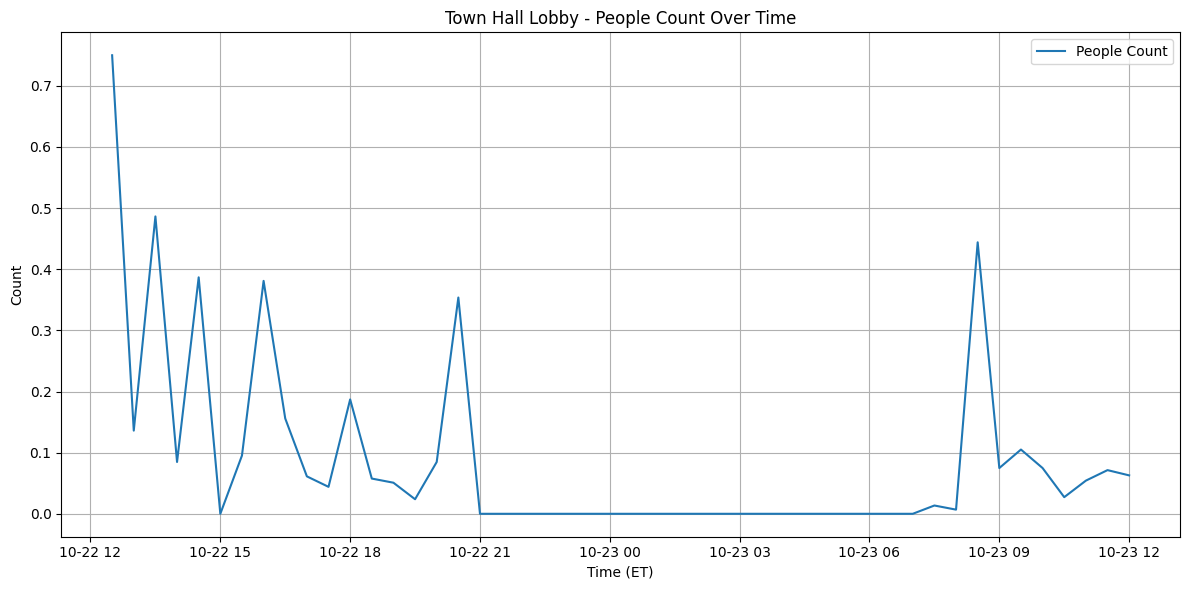

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled.values, label="People Count")
plt.title("Town Hall Lobby - People Count Over Time")
plt.xlabel("Time (ET)")
plt.ylabel("Count")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()